In [1]:
# !python -m pip install tensorflow
# !python -m pip install tensorflow-macos
# !python -m pip install tensorflow-metal

In [140]:
import sys
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
import seaborn as sns

from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam

# CMP normalisation
from bioinfokit.analys import norm
nm = norm()
# Z-score Standardisation
import scipy.stats as stats
# Pre-processing
from sklearn.preprocessing import MinMaxScaler

print (f"Python Platform: {platform.platform ()}")
print (f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print ()

print (f"Python {sys.version}")
print (f"Pandas {pd.__version__}")
print (f"Scikit-Learn {sk.__version__}")
print (f"SciPy {sp.__version__}")
gpu = len (tf.config.list_physical_devices ('GPU'))>0
print ("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-14.2.1-arm64-arm-64bit
Tensor Flow Version: 2.16.2
Keras Version: 3.5.0

Python 3.11.7 (main, Dec 15 2023, 12:09:56) [Clang 14.0.6 ]
Pandas 2.2.2
Scikit-Learn 1.5.1
SciPy 1.14.1
GPU is available


In [86]:
# Adult Bone Marrow Erythroid cells
abm = pd.read_csv("Ery_AdultBoneMarrow_DBEC_MolsPerCell.csv",
                 skiprows = 7,
                 low_memory=False)
abm = abm[abm['ALAS2'] > 0]
abm.set_index(['Cell_Index'], inplace=True)
nm = norm()
nm.cpm(df=abm)
abm = nm.cpm_norm
abm = abm.fillna(0)
abm = abm.replace({0:1})
abm = abm.map(np.log)
abm = abm.assign(Sample='Adult Bone Marrow') # Sample name
abm

,ADA,ADGRE1,ADGRG3,AIM2,ALAS2,ANXA5,AOC3,APOBEC3G,APOE,AQP9,...,VPREB3,VPS28,VSIG4,XBP1,YBX3,ZAP70,ZBED2,ZBTB16,ZNF683,Sample
Cell_Index,,,,,,,,,,,,,,,,,,,,,
724557,10.871072,0.000000,0.0,0.0,5.399383,9.790159,0.0,0.0,0.0,0.000000,...,0.0,6.689423,0.0,0.00000,5.038572,0.0,0.0,0.0,0.0,Adult Bone Marrow
101655,11.787362,0.000000,0.0,0.0,6.143823,12.275066,0.0,0.0,0.0,0.000000,...,0.0,6.689423,0.0,0.00000,5.766810,0.0,0.0,0.0,0.0,Adult Bone Marrow
724827,0.000000,13.815511,0.0,0.0,3.148091,11.736069,0.0,0.0,0.0,11.176453,...,0.0,0.000000,0.0,9.76954,4.478956,0.0,0.0,0.0,0.0,Adult Bone Marrow
423998,0.000000,0.000000,0.0,0.0,2.454944,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,7.97778,0.000000,0.0,0.0,0.0,0.0,Adult Bone Marrow
431641,0.000000,0.000000,0.0,0.0,2.454944,9.790159,0.0,0.0,0.0,0.000000,...,0.0,6.689423,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,Adult Bone Marrow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230235,0.000000,0.000000,0.0,0.0,3.553556,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,3.498127,0.0,0.0,0.0,0.0,Adult Bone Marrow
799901,0.000000,0.000000,0.0,0.0,3.553556,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,4.478956,0.0,0.0,0.0,0.0,Adult Bone Marrow
548109,0.000000,0.000000,0.0,0.0,3.841238,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.00000,4.797410,0.0,0.0,0.0,0.0,Adult Bone Marrow


In [87]:
# Fetal Liver Erythroid cells
fl = pd.read_csv("Ery_FetalLiver_DBEC_MolsPerCell.csv",
                 skiprows = 7,
                 low_memory=False)
fl = fl[fl['ALAS2'] > 0]
fl.set_index(['Cell_Index'], inplace=True)
nm = norm()
nm.cpm(df=fl)
fl = nm.cpm_norm
fl = fl.fillna(0)
fl = fl.replace({0:1})
fl = fl.map(np.log)
fl = fl.assign(Sample='Fetal Liver') # Sample name
fl

,ADA,ADGRE1,ADGRG3,AIM2,ALAS2,ANXA5,AOC3,APOBEC3G,APOE,AQP9,...,VPREB3,VPS28,VSIG4,XBP1,YBX3,ZAP70,ZBED2,ZBTB16,ZNF683,Sample
Cell_Index,,,,,,,,,,,,,,,,,,,,,
144770,0.0,0.0,0.000000,0.0,3.666551,11.074671,0.0,0.000000,0.0,0.0,...,0.0,8.363043,0.0,10.13921,3.995495,0.0,0.0,0.0,0.0,Fetal Liver
124485,0.0,0.0,12.716898,0.0,2.973403,12.327434,0.0,11.176453,0.0,0.0,...,0.0,0.000000,0.0,10.13921,2.896883,0.0,0.0,0.0,0.0,Fetal Liver
437509,0.0,0.0,0.000000,0.0,5.612461,0.000000,0.0,0.000000,0.0,0.0,...,0.0,7.957577,0.0,10.13921,5.381790,0.0,0.0,0.0,0.0,Fetal Liver
277780,0.0,0.0,13.410045,0.0,3.666551,11.074671,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,Fetal Liver
308053,0.0,0.0,0.000000,0.0,2.973403,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,Fetal Liver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384930,0.0,0.0,0.000000,0.0,4.919314,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,4.506321,0.0,0.0,0.0,0.0,Fetal Liver
617184,0.0,0.0,0.000000,0.0,3.666551,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,4.842793,0.0,0.0,0.0,0.0,Fetal Liver
460329,0.0,0.0,0.000000,0.0,4.359698,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,4.688642,0.0,0.0,0.0,0.0,Fetal Liver


In [88]:
# Cord Blood Erythroid cells
cb = pd.read_csv("Ery_CordBlood_DBEC_MolsPerCell.csv",
                 skiprows = 7,
                 low_memory=False)
cb = cb[cb['ALAS2'] > 0]
cb.set_index(['Cell_Index'], inplace=True)
nm = norm()
nm.cpm(df=cb)
cb = nm.cpm_norm
cb = cb.fillna(0)
cb = cb.replace({0:1})
cb = cb.map(np.log)
cb = cb.assign(Sample='Cord Blood') # Sample name
cb

,ADA,ADGRE1,ADGRG3,AIM2,ALAS2,ANXA5,AOC3,APOBEC3G,APOE,AQP9,...,VPREB3,VPS28,VSIG4,XBP1,YBX3,ZAP70,ZBED2,ZBTB16,ZNF683,Sample
Cell_Index,,,,,,,,,,,,,,,,,,,,,
611594,0.000000,0.0,0.0,0.0,4.749657,12.881201,0.0,0.0,0.0,13.697728,...,0.0,0.000000,0.0,11.373164,6.915835,0.0,0.0,0.0,0.0,Cord Blood
559476,0.000000,0.0,0.0,0.0,5.953629,11.581918,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,5.480751,0.0,0.0,0.0,0.0,Cord Blood
717478,12.429216,0.0,0.0,0.0,7.479686,0.000000,0.0,0.0,0.0,0.000000,...,0.0,7.929407,0.0,9.986869,7.878646,0.0,0.0,0.0,0.0,Cord Blood
192288,0.000000,0.0,0.0,0.0,7.955109,0.000000,0.0,0.0,0.0,0.000000,...,0.0,8.622554,0.0,0.000000,8.371123,0.0,0.0,0.0,0.0,Cord Blood
540087,12.429216,0.0,0.0,0.0,6.946881,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,11.596307,7.238609,0.0,0.0,0.0,0.0,Cord Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640132,0.000000,0.0,0.0,0.0,4.344191,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,5.480751,0.0,0.0,0.0,0.0,Cord Blood
421174,0.000000,0.0,0.0,0.0,4.344191,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,4.564460,0.0,0.0,0.0,0.0,Cord Blood
62095,0.000000,0.0,0.0,0.0,5.037339,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,5.257607,0.0,0.0,0.0,0.0,Cord Blood


In [89]:
# non-Erythroid cells as Negative Control
pbmc = pd.read_csv("PBMC_DBEC_MolsPerCell.csv",
                 skiprows = 7,
                 low_memory=False)
pbmc = pbmc[pbmc['ALAS2'] < 1]
pbmc.set_index(['Cell_Index'], inplace=True)
nm = norm()
nm.cpm(df=pbmc)
pbmc = nm.cpm_norm
pbmc = pbmc.fillna(0)
pbmc = pbmc.replace({0:1})
pbmc = pbmc.map(np.log)
pbmc = pbmc.assign(Sample='Negative Control') # Sample name
pbmc

,ADA,ADGRE1,ADGRG3,AIM2,ALAS2,ANXA5,AOC3,APOBEC3G,APOE,AQP9,...,VPREB3,VPS28,VSIG4,XBP1,YBX3,ZAP70,ZBED2,ZBTB16,ZNF683,Sample
Cell_Index,,,,,,,,,,,,,,,,,,,,,
465057,6.836365,0.00000,0.0,0.0,0.0,6.370823,0.0,8.401317,0.0,0.000000,...,0.0,7.090877,0.0,9.950981,0.000000,0.0,0.0,0.000000,0.0,Negative Control
124703,7.529512,0.00000,0.0,0.0,0.0,6.370823,0.0,8.534848,0.0,0.000000,...,0.0,5.992265,0.0,9.236327,0.000000,0.0,0.0,0.000000,0.0,Negative Control
468260,7.529512,0.00000,0.0,0.0,0.0,5.677676,0.0,7.148554,0.0,0.000000,...,0.0,0.000000,0.0,8.046743,5.760353,0.0,0.0,0.000000,0.0,Negative Control
427285,0.000000,7.59691,0.0,0.0,0.0,7.181754,0.0,7.148554,0.0,8.479175,...,0.0,7.601703,0.0,7.199445,8.593566,0.0,0.0,7.943393,0.0,Negative Control
738786,6.836365,7.59691,0.0,0.0,0.0,8.162583,0.0,0.000000,0.0,8.191493,...,0.0,8.071706,0.0,7.199445,7.369791,0.0,0.0,0.000000,0.0,Negative Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19158,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,Negative Control
430509,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,Negative Control
509952,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,6.100833,0.000000,0.0,0.0,0.000000,0.0,Negative Control


In [90]:
# Max cell number for down-sampling 
def downsample(abm, fl, cb, pbmc):
    ds = min([len(abm), len(fl), len(cb), len(pbmc)])
    print(f'Cell downsample count is {ds}')
    return ds

cell_downsample_N = downsample(abm, fl, cb, pbmc)

Cell downsample count is 1683


In [91]:
# Down-sampling - balances the datasets in numbers

# ABM NECs Ds
abm_ds = abm.sample(n=cell_downsample_N)

# FLP NECs Ds
fl_ds = fl.sample(n=cell_downsample_N)

# CB NECs Ds
cb_ds = cb.sample(n=cell_downsample_N)

# NC Ds
nc_ds = pbmc.sample(n=cell_downsample_N)

In [124]:
# data frame concatenation - train frame creation
ST_combined = pd.concat([abm_ds, fl_ds, cb_ds, nc_ds])

ST_combined = pd.get_dummies(ST_combined, columns=['Sample'])

ST_combined = ST_combined.astype(float)

tf = ST_combined

tf

,ADA,ADGRE1,ADGRG3,AIM2,ALAS2,ANXA5,AOC3,APOBEC3G,APOE,AQP9,...,XBP1,YBX3,ZAP70,ZBED2,ZBTB16,ZNF683,Sample_Adult Bone Marrow,Sample_Cord Blood,Sample_Fetal Liver,Sample_Negative Control
Cell_Index,,,,,,,,,,,,,,,,,,,,,
857497,0.000000,0.0,0.0,0.0,5.981305,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,6.331340,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
789792,0.000000,0.0,0.0,0.0,5.673820,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,5.395247,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
259221,0.000000,0.0,0.0,0.0,3.841238,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,4.478956,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
274648,0.000000,0.0,0.0,0.0,5.450676,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,4.596739,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
592314,0.000000,0.0,0.0,0.0,6.326145,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,6.291335,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86327,0.000000,0.0,0.0,0.0,0.000000,4.984529,0.0,0.000000,0.0,0.0,...,6.100833,5.760353,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
181147,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,7.885921,0.0,0.0,0.0,0.0,0.0,0.0,1.0
411494,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
# shuffle train frame
tf = tf.sample(frac=1, random_state=14)

In [126]:
# min-max scaling / fit-transform (ft)
tf_ft = MinMaxScaler().fit_transform(tf)
# ndarray to pd.df
tf = pd.DataFrame(tf_ft, columns = tf.columns, index=tf.index)
tf.head()

,ADA,ADGRE1,ADGRG3,AIM2,ALAS2,ANXA5,AOC3,APOBEC3G,APOE,AQP9,...,XBP1,YBX3,ZAP70,ZBED2,ZBTB16,ZNF683,Sample_Adult Bone Marrow,Sample_Cord Blood,Sample_Fetal Liver,Sample_Negative Control
Cell_Index,,,,,,,,,,,,,,,,,,,,,
356989,0.0,0.0,0.0,0.0,0.781403,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.662571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
150594,0.0,0.0,0.0,0.0,0.000000,0.538027,0.0,0.000000,0.0,0.0,...,0.526101,0.906259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
242722,0.0,0.0,0.0,0.0,0.815106,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.447513,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
129924,0.0,0.0,0.0,0.0,0.705516,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.631373,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
63008,0.0,0.0,0.0,0.0,0.000000,0.511906,0.0,0.587801,0.0,0.0,...,0.000000,0.826133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [127]:
# Train-test split
x = tf.drop(['Sample_Adult Bone Marrow', 'Sample_Cord Blood',
             'Sample_Fetal Liver', 'Sample_Negative Control'], axis=1)
y = tf[['Sample_Adult Bone Marrow', 'Sample_Cord Blood',
        'Sample_Fetal Liver', 'Sample_Negative Control']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=14)

In [128]:
int(len(x_train))

5385

In [134]:
input_shape = len(x_train.T)
print('Input shape')
print(input_shape)
print('Batch size')
print(len(x_train))
batch_size = int(len(x_train) / 15)
print('Number of batches')
print(batch_size)

Input shape
397
Batch size
5385
Number of batches
359


# ErythrOrigin

In [131]:
# Model
model = Sequential([
                    Dense(input_shape*2, 
                          input_shape=(input_shape,), 
                          activation='relu', 
                          kernel_regularizer=l1_l2(l1=0.005, l2=0.0001),
                         ),
                    Dense(input_shape*4, 
                          input_shape=(input_shape,), 
                          activation='relu',
                          ),
                    Dropout(0.5),
                    Dense(input_shape*8, 
                          input_shape=(input_shape,), 
                          activation='relu',
                          ),
                    Dropout(0.5),
                    Dense(4, activation='softmax')
                    ])

# Optimizer
optimizer = Adam(learning_rate=0.00001)

# Model compilation
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit model
model.fit(x_train, y_train, epochs=batch_size*4, batch_size=batch_size)

Epoch 1/1400


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.2842 - loss: 57.3140
Epoch 2/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3567 - loss: 57.0265
Epoch 3/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3723 - loss: 56.7437
Epoch 4/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4172 - loss: 56.4600
Epoch 5/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4761 - loss: 56.1873
Epoch 6/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5446 - loss: 55.9110
Epoch 7/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5568 - loss: 55.6386
Epoch 8/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5845 - loss: 55.3620
Epoch 9/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5853 - loss: 55.0859
Epoch 10/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5705 - loss: 54.8308
Epoch 11/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5851 - loss: 54.5507
Epoch 12/1400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s

In [135]:
model.save('./ErythroOrigin.keras')

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


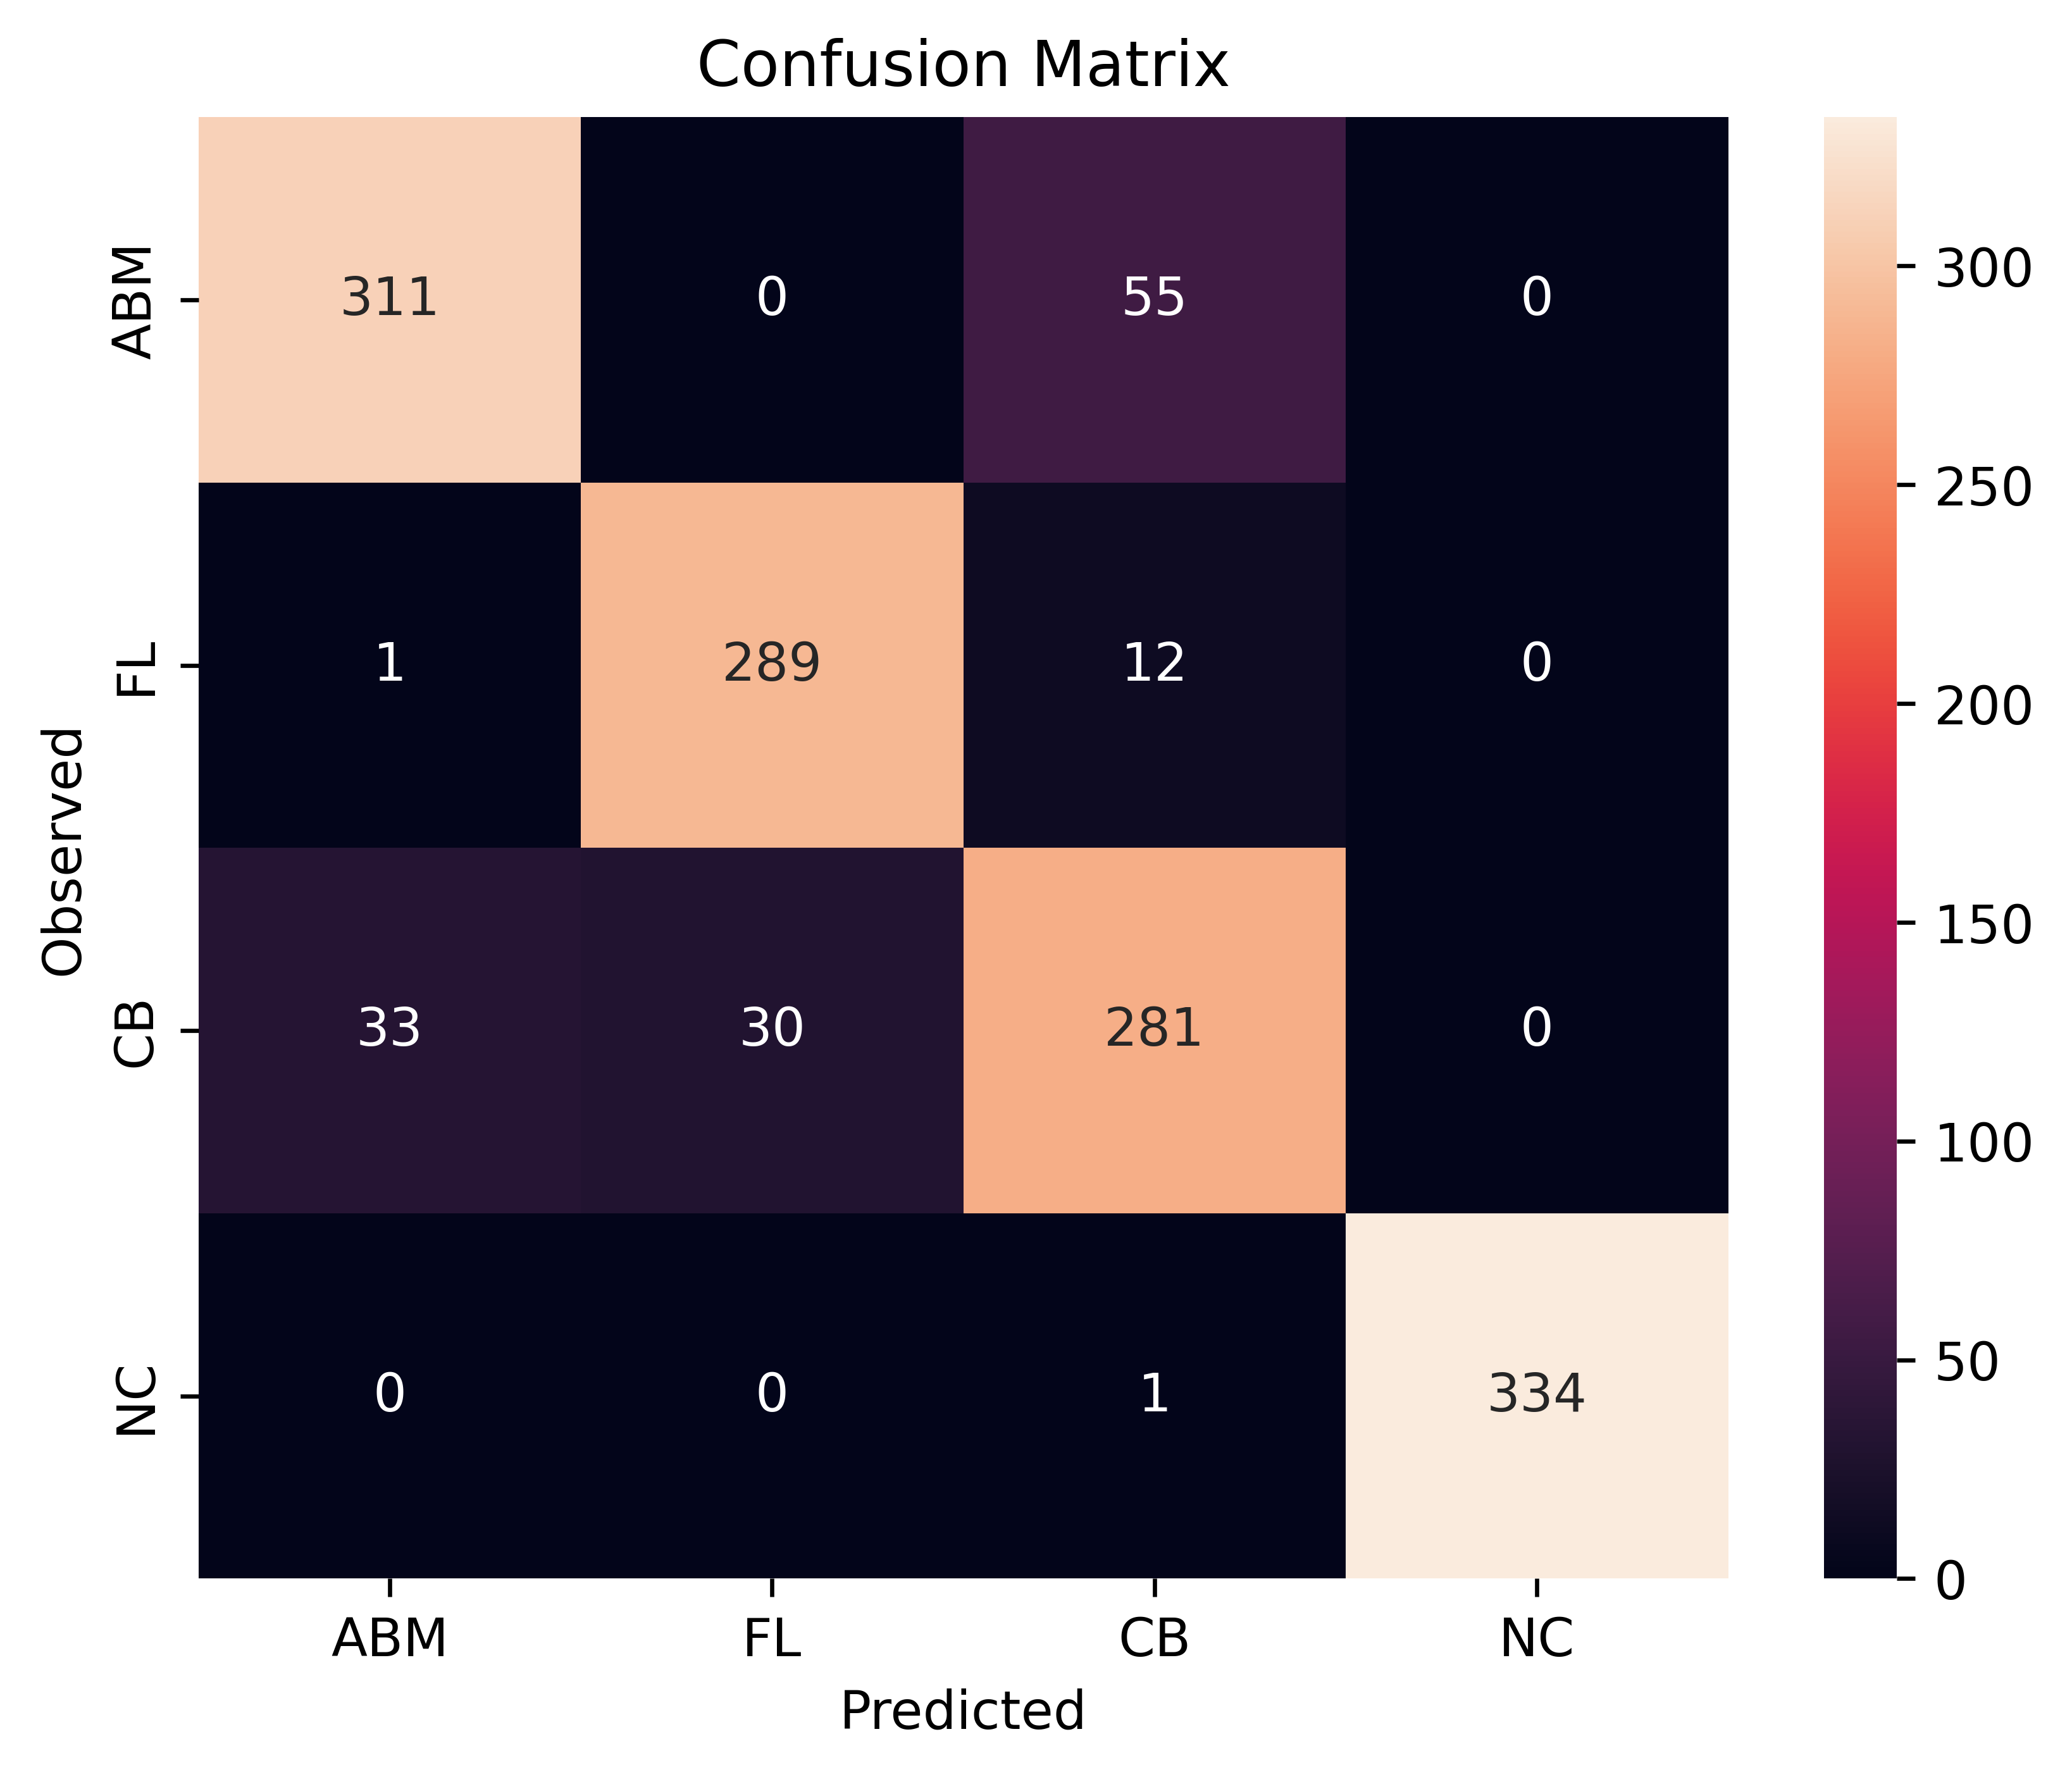

In [150]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6.5, 5), dpi = 600) 

cm_labels = ['ABM','FL','CB','NC']
ax= plt.subplot()

y_pred = model.predict(x_test)
cm = confusion_matrix(np.asarray(y_pred).argmax(axis=1), np.asarray(y_test).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax); #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Observed');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(cm_labels); ax.yaxis.set_ticklabels(cm_labels);